Epoch 1/5
844/844 - 15s - 18ms/step - accuracy: 0.9187 - loss: 0.2647 - val_accuracy: 0.9827 - val_loss: 0.0586
Epoch 2/5
844/844 - 13s - 16ms/step - accuracy: 0.9723 - loss: 0.0929 - val_accuracy: 0.9883 - val_loss: 0.0442
Epoch 3/5
844/844 - 14s - 17ms/step - accuracy: 0.9786 - loss: 0.0707 - val_accuracy: 0.9908 - val_loss: 0.0328
Epoch 4/5
844/844 - 14s - 17ms/step - accuracy: 0.9829 - loss: 0.0565 - val_accuracy: 0.9897 - val_loss: 0.0363
Epoch 5/5
844/844 - 14s - 17ms/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9907 - val_loss: 0.0348
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9844 - loss: 0.0380
Test Accuracy: 0.9887
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


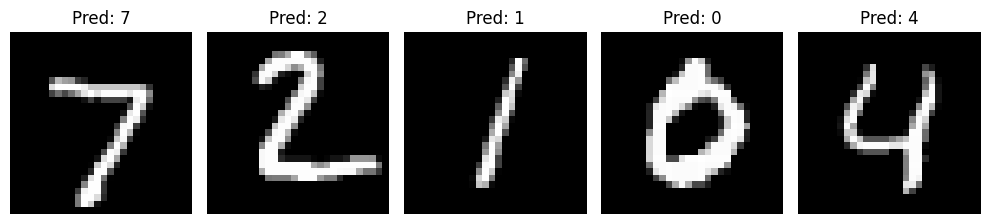

: 

In [ ]:

# Task 2: Deep Learning with TensorFlow - MNIST CNN Classifier

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and visualize 5 test images
predictions = model.predict(x_test[:5])
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

model.save("mnist_cnn.keras")